## 第零步：分析库导入与分析目标设置
为了更方便地进行数据处理与分析，我们定义了一个基类`DataframeAnalysis`,将输入数据统一处理成`pandas.DataFrame`格式.

目前支持的数据格式有：
- `csv`
- `xlsx`
- `parquet`

输入参数有：
- `root_path`: 所有数据存放的根路径
- `data_path`: 各个数据集在根路径下的子路径

In [1]:
pwd

'/Users/yumeng/Desktop/Data-Process-Library/example/XiexinForecasting/PhotovoltaicPower'

In [2]:
from Analysis.DataframeAnalysis import DataframeAnalysis
import plotly.express as px
import pandas as pd
import os
import plotly.graph_objects as go
# 导入中冶赛迪高炉应用数据
root_path = '/Users/yumeng/Desktop/data/Xiexindata/photovoltaic_power_plant_data'
data_path = 'ps_id_8338_merged.csv'
df = pd.read_csv(os.path.join(root_path, data_path), encoding='utf-8')
DA = DataframeAnalysis(dataFrame=df)
DA.root_path = root_path
DA.data_path = data_path

DataAnalysis loading data from DataFrame with shape: (82284, 30)


In [3]:
# 获得所有列名
DA.df_raw.columns

Index(['sn', 'ts', 'er', 'pac', 'lng', 'lat', 'roof_type', 'angle',
       'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'pressure_msl', 'surface_pressure', 'precipitation_probability',
       'cloud_cover', 'cloud_cover_low', 'cloud_cover_mid', 'cloud_cover_high',
       'shortwave_radiation', 'direct_radiation', 'direct_normal_irradiance',
       'diffuse_radiation', 'wind_speed_10m', 'wind_speed_80m',
       'wind_speed_120m', 'wind_direction_10m', 'wind_direction_80m',
       'wind_direction_120m', 'variable_date', 'full_time'],
      dtype='object')

In [4]:
DA.df_raw

sn                   ts   er    pac        lng  \
0      GSABZT020K000A230910135  2024-03-21 13:10:00  NaN  14.12  114.23612   
1      GSABZT020K000A230910135  2024-03-21 13:15:00  NaN  13.36  114.23612   
2      GSABZT020K000A230910135  2024-03-21 13:20:00  NaN  13.54  114.23612   
3      GSABZT020K000A230910135  2024-03-21 13:25:00  NaN  11.31  114.23612   
4      GSABZT020K000A230910135  2024-03-21 13:30:00  NaN  10.28  114.23612   
...                        ...                  ...  ...    ...        ...   
82279  GSABZT020K000A230910135  2025-05-10 19:00:00  0.0   0.07  114.23612   
82280  GSABZT020K000A230910135  2025-05-10 19:05:00  0.0   0.03  114.23612   
82281  GSABZT020K000A230910135  2025-05-10 19:10:00  0.0   0.02  114.23612   
82282  GSABZT020K000A230910135  2025-05-10 19:15:00  0.0   0.02  114.23612   
82283  GSABZT020K000A230910135  2025-05-10 19:20:00  0.0   0.00  114.23612   

            lat roof_type  angle  temperature_2m  relative_humidity_2m  ...  \
0      30.21621     斜屋顶双坡   15.0             NaN                   NaN  ...   
1      30.21621     斜屋顶双坡   15.0         21.9567               39.6473  ...   
2      30.21621     斜屋顶双坡   15.0             NaN                   NaN  ...   
3      30.21621     斜屋顶双坡   15.0             NaN                   NaN  ...   
4      30.21621     斜屋顶双坡   15.0         21.9386               40.5852  ...   
...         ...       ...    ...             ...                   ...  ...   
82279  30.21621     斜屋顶双坡   15.0         17.9331               65.9327  ...   
82280  30.21621     斜屋顶双坡   15.0             NaN                   NaN  ...   
82281  30.21621     斜屋顶双坡   15.0             NaN                   NaN  ...   
82282  30.21621     斜屋顶双坡   15.0         17.6393               68.0414  ...   
82283  30.21621     斜屋顶双坡   15.0             NaN                   NaN  ...   

       direct_normal_irradiance  diffuse_radiation  wind_speed_10m  \
0                           NaN                NaN             NaN   
1                      670.7713           191.0799          6.3878   
2                           NaN                NaN             NaN   
3                           NaN                NaN             NaN   
4                      663.9687           186.9422          6.4842   
...                         ...                ...             ...   
82279                    0.0000             3.2562          1.8114   
82280                       NaN                NaN             NaN   
82281                       NaN                NaN             NaN   
82282                    0.0000             1.0854          1.8438   
82283                       NaN                NaN             NaN   

       wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                 NaN              NaN                 NaN   
1              8.2638           8.6894            199.9092   
2                 NaN              NaN                 NaN   
3                 NaN              NaN                 NaN   
4              8.4193           8.8592            200.5257   
...               ...              ...                 ...   
82279          3.8765           4.4971            227.4934   
82280             NaN              NaN                 NaN   
82281             NaN              NaN                 NaN   
82282          3.9840           4.6301            224.2072   
82283             NaN              NaN                 NaN   

       wind_direction_80m  wind_direction_120m        variable_date  \
0                     NaN                  NaN                  NaN   
1                199.9286             199.9373  2024-03-21 13:15:00   
2                     NaN                  NaN                  NaN   
3                     NaN                  NaN                  NaN   
4                200.4633             200.4388  2024-03-21 13:30:00   
...                   ...                  ...                  ...   
82279            233.5576             234.8832  2025-05-10 

In [5]:
DA.plot_column_plotly(columns=['pac'], start_point=0, length=100000)

## 第一步：对齐时间戳
按照功率数据的标准，插值为5min频率

In [6]:
#检查full_time是否全是5min间隔


import pandas as pd

# 确保 full_time 为 datetime 类型
df['full_time'] = pd.to_datetime(df['full_time'])

# 创建严格的 5 分钟间隔时间戳，起止时间取自原 full_time 范围
new_full_time = pd.date_range(
    start=df['full_time'].min(),
    end=df['full_time'].max(),
    freq='5min'  # 推荐用 '5min' 替代 '5T'
)

# 替换旧的 full_time 或创建一个新列
df = df.set_index('full_time')         # 将 full_time 设为索引
df = df.reindex(new_full_time)         # 按严格 5min 间隔重建索引
df.index.name = 'full_time'            # 恢复索引名
df = df.reset_index()                  # 如需使用为普通列

# 保存回 DA.df_raw
DA.df_raw = df



DA.df_raw

full_time                       sn                   ts   er  \
0      2024-03-21 13:10:00  GSABZT020K000A230910135  2024-03-21 13:10:00  NaN   
1      2024-03-21 13:15:00  GSABZT020K000A230910135  2024-03-21 13:15:00  NaN   
2      2024-03-21 13:20:00  GSABZT020K000A230910135  2024-03-21 13:20:00  NaN   
3      2024-03-21 13:25:00  GSABZT020K000A230910135  2024-03-21 13:25:00  NaN   
4      2024-03-21 13:30:00  GSABZT020K000A230910135  2024-03-21 13:30:00  NaN   
...                    ...                      ...                  ...  ...   
119590 2025-05-10 19:00:00  GSABZT020K000A230910135  2025-05-10 19:00:00  0.0   
119591 2025-05-10 19:05:00  GSABZT020K000A230910135  2025-05-10 19:05:00  0.0   
119592 2025-05-10 19:10:00  GSABZT020K000A230910135  2025-05-10 19:10:00  0.0   
119593 2025-05-10 19:15:00  GSABZT020K000A230910135  2025-05-10 19:15:00  0.0   
119594 2025-05-10 19:20:00  GSABZT020K000A230910135  2025-05-10 19:20:00  0.0   

          pac        lng       lat roof_type  angle  temperature_2m  ...  \
0       14.12  114.23612  30.21621     斜屋顶双坡   15.0             NaN  ...   
1       13.36  114.23612  30.21621     斜屋顶双坡   15.0         21.9567  ...   
2       13.54  114.23612  30.21621     斜屋顶双坡   15.0             NaN  ...   
3       11.31  114.23612  30.21621     斜屋顶双坡   15.0             NaN  ...   
4       10.28  114.23612  30.21621     斜屋顶双坡   15.0         21.9386  ...   
...       ...        ...       ...       ...    ...             ...  ...   
119590   0.07  114.23612  30.21621     斜屋顶双坡   15.0         17.9331  ...   
119591   0.03  114.23612  30.21621     斜屋顶双坡   15.0             NaN  ...   
119592   0.02  114.23612  30.21621     斜屋顶双坡   15.0             NaN  ...   
119593   0.02  114.23612  30.21621     斜屋顶双坡   15.0         17.6393  ...   
119594   0.00  114.23612  30.21621     斜屋顶双坡   15.0             NaN  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    NaN                       NaN                NaN   
1               545.3728                  670.7713           191.0799   
2                    NaN                       NaN                NaN   
3                    NaN                       NaN                NaN   
4               527.4263                  663.9687           186.9422   
...                  ...                       ...                ...   
119590            0.0000                    0.0000             3.2562   
119591               NaN                       NaN                NaN   
119592               NaN                       NaN                NaN   
119593            0.0000                    0.0000             1.0854   
119594               NaN                       NaN                NaN   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                  NaN             NaN              NaN                 NaN   
1               6.3878          8.2638           8.6894            199.9092   
2                  NaN             NaN              NaN                 NaN   
3                  NaN             NaN              NaN                 NaN   
4               6.4842          8.4193           8.8592            200.5257   
...                ...             ...              ...                 ...   
119590          1.8114          3.8765           4.4971            227.4934   
119591             NaN             NaN              NaN                 NaN   
119592             NaN             NaN              NaN                 NaN   
119593          1.8438          3.9840           4.6301            224.2072   
119594             NaN             NaN              NaN                 NaN   

        wind_direction_80m  wind_direction_120m        variable_date  
0                      NaN                  NaN                  NaN  
1                 199.9286             199.9373  2024-03-21 13:15:00  
2                      NaN                  NaN                  NaN  
3                    

## 第二步：缺失值分析

检查数据集中有无缺失值，包括：
- 缺失的特征值
- 缺失的时间戳

In [7]:
# 获得'sn'列包含缺失值的index条目
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([    73,     74,     75,     76,     77,     78,     79,     80,     81,
            82,
        ...
        119418, 119419, 119420, 119421, 119422, 119423, 119424, 119425, 119426,
        119427],
       dtype='int64', length=55553),
 True)

In [8]:
# 'sn'列值都是一样的，用上一行值进行填充
DA.df_raw[['sn']] = DA.df_raw[['sn']].ffill()

In [9]:
# 检查'sn'列空值情况
DA.getNanIndex(start_col='sn',end_col='sn')

(Index([], dtype='int64'), False)

In [10]:
# 获得'ts'列包含缺失值的index条目
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([    73,     74,     75,     76,     77,     78,     79,     80,     81,
            82,
        ...
        119418, 119419, 119420, 119421, 119422, 119423, 119424, 119425, 119426,
        119427],
       dtype='int64', length=55553),
 True)

In [11]:
DA.df_raw['ts'] = DA.df_raw['ts'].fillna(DA.df_raw['full_time'])

In [12]:
# 检查'ts'列空值情况
DA.getNanIndex(start_col='ts',end_col='ts')

(Index([], dtype='int64'), False)

In [13]:
# 获得'er'列包含缺失值的index条目
DA.getNanIndex(start_col='er',end_col='er')

(Index([     0,      1,      2,      3,      4,      5,      6,      7,      8,
             9,
        ...
        119418, 119419, 119420, 119421, 119422, 119423, 119424, 119425, 119426,
        119427],
       dtype='int64', length=56158),
 True)

In [14]:
# 'er'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'er': 'er'] = DA.df_raw.loc[:, 'er': 'er'].fillna(0)

In [15]:
# 检查'er'列空值情况
DA.getNanIndex(start_col='er',end_col='er')

(Index([], dtype='int64'), False)

In [16]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([    73,     74,     75,     76,     77,     78,     79,     80,     81,
            82,
        ...
        119418, 119419, 119420, 119421, 119422, 119423, 119424, 119425, 119426,
        119427],
       dtype='int64', length=55553),
 True)

In [17]:
# 'pac'列空值和 0 值都代表无异常，将所有空值全部填充为 0 值
DA.df_raw.loc[:, 'pac': 'pac'] = DA.df_raw.loc[:, 'pac': 'pac'].fillna(0)

In [18]:
# 检查'pac'列空值情况
DA.getNanIndex(start_col='pac',end_col='pac')

(Index([], dtype='int64'), False)

In [19]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([    73,     74,     75,     76,     77,     78,     79,     80,     81,
            82,
        ...
        119418, 119419, 119420, 119421, 119422, 119423, 119424, 119425, 119426,
        119427],
       dtype='int64', length=55553),
 True)

In [20]:
# 'lng', 'lat', 'roof_type', 'angle'列值都是一样的，用上一行值进行填充
DA.df_raw[['lng', 'lat', 'roof_type', 'angle']] = DA.df_raw[['lng', 'lat', 'roof_type', 'angle']].ffill()

In [21]:
# 检查'lng', 'lat', 'roof_type', 'angle'列的空值情况
DA.getNanIndex(start_col='lng',end_col='angle')

(Index([], dtype='int64'), False)

In [22]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([     0,      2,      3,      5,      6,      8,      9,     11,     12,
            14,
        ...
        119580, 119582, 119583, 119585, 119586, 119588, 119589, 119591, 119592,
        119594],
       dtype='int64', length=80306),
 True)

In [23]:
# 对气象数据进行线性插值
DA.getInterpolate(start_col='temperature_2m', end_col='wind_direction_120m', method='linear')

kwargs: {'method': 'linear'}


full_time                       sn                   ts   er  \
0      2024-03-21 13:10:00  GSABZT020K000A230910135  2024-03-21 13:10:00  0.0   
1      2024-03-21 13:15:00  GSABZT020K000A230910135  2024-03-21 13:15:00  0.0   
2      2024-03-21 13:20:00  GSABZT020K000A230910135  2024-03-21 13:20:00  0.0   
3      2024-03-21 13:25:00  GSABZT020K000A230910135  2024-03-21 13:25:00  0.0   
4      2024-03-21 13:30:00  GSABZT020K000A230910135  2024-03-21 13:30:00  0.0   
...                    ...                      ...                  ...  ...   
119590 2025-05-10 19:00:00  GSABZT020K000A230910135  2025-05-10 19:00:00  0.0   
119591 2025-05-10 19:05:00  GSABZT020K000A230910135  2025-05-10 19:05:00  0.0   
119592 2025-05-10 19:10:00  GSABZT020K000A230910135  2025-05-10 19:10:00  0.0   
119593 2025-05-10 19:15:00  GSABZT020K000A230910135  2025-05-10 19:15:00  0.0   
119594 2025-05-10 19:20:00  GSABZT020K000A230910135  2025-05-10 19:20:00  0.0   

          pac        lng       lat roof_type  angle  temperature_2m  ...  \
0       14.12  114.23612  30.21621     斜屋顶双坡   15.0             NaN  ...   
1       13.36  114.23612  30.21621     斜屋顶双坡   15.0       21.956700  ...   
2       13.54  114.23612  30.21621     斜屋顶双坡   15.0       21.950667  ...   
3       11.31  114.23612  30.21621     斜屋顶双坡   15.0       21.944633  ...   
4       10.28  114.23612  30.21621     斜屋顶双坡   15.0       21.938600  ...   
...       ...        ...       ...       ...    ...             ...  ...   
119590   0.07  114.23612  30.21621     斜屋顶双坡   15.0       17.933100  ...   
119591   0.03  114.23612  30.21621     斜屋顶双坡   15.0       17.835167  ...   
119592   0.02  114.23612  30.21621     斜屋顶双坡   15.0       17.737233  ...   
119593   0.02  114.23612  30.21621     斜屋顶双坡   15.0       17.639300  ...   
119594   0.00  114.23612  30.21621     斜屋顶双坡   15.0       17.639300  ...   

        direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0                    NaN                       NaN                NaN   
1             545.372800                670.771300         191.079900   
2             539.390633                668.503767         189.700667   
3             533.408467                666.236233         188.321433   
4             527.426300                663.968700         186.942200   
...                  ...                       ...                ...   
119590          0.000000                  0.000000           3.256200   
119591          0.000000                  0.000000           2.532600   
119592          0.000000                  0.000000           1.809000   
119593          0.000000                  0.000000           1.085400   
119594          0.000000                  0.000000           1.085400   

        wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0                  NaN             NaN              NaN                 NaN   
1             6.387800        8.263800         8.689400            199.9092   
2             6.419933        8.315633         8.746000            200.1147   
3             6.452067        8.367467         8.802600            200.3202   
4             6.484200        8.419300         8.859200            200.5257   
...                ...             ...              ...                 ...   
119590        1.811400        3.876500         4.497100            227.4934   
119591        1.822200        3.912333         4.541433            226.3980   
119592        1.833000        3.948167         4.585767            225.3026   
119593        1.843800        3.984000         4.630100            224.2072   
119594        1.843800        3.984000         4.630100            224.2072   

        wind_direction_80m  wind_direction_120m        variable_date  
0                      NaN                  NaN                  NaN  
1               199.928600           199.937300  2024-03-21 13:15:00  
2               200.106833           200.104467                  NaN  
3               200.2

In [24]:
# 检查气象数据列的空值情况
DA.getNanIndex(start_col='temperature_2m',end_col='wind_direction_120m')

(Index([0], dtype='int64'), True)

In [25]:
DA.df_raw['variable_date'] = DA.df_raw['variable_date'].fillna(DA.df_raw['full_time'])

In [26]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='sn',end_col='full_time')

(RangeIndex(start=0, stop=119595, step=1), True)

In [27]:
# 检查时间戳缺失情况
missing_dates, flag, timestamps, expected_range = DA.checkDateContinuity('ts', freq='5min')
print(f"Missing dates {flag}: {missing_dates}")

Missing dates True: DatetimeIndex([], dtype='datetime64[ns]', freq='5min')


In [28]:
DA.df_raw=DA.df_raw.set_index(timestamps)
DA.df_raw

full_time                       sn  \
ts                                                                 
2024-03-21 13:10:00 2024-03-21 13:10:00  GSABZT020K000A230910135   
2024-03-21 13:15:00 2024-03-21 13:15:00  GSABZT020K000A230910135   
2024-03-21 13:20:00 2024-03-21 13:20:00  GSABZT020K000A230910135   
2024-03-21 13:25:00 2024-03-21 13:25:00  GSABZT020K000A230910135   
2024-03-21 13:30:00 2024-03-21 13:30:00  GSABZT020K000A230910135   
...                                 ...                      ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT020K000A230910135   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT020K000A230910135   
2025-05-10 19:10:00 2025-05-10 19:10:00  GSABZT020K000A230910135   
2025-05-10 19:15:00 2025-05-10 19:15:00  GSABZT020K000A230910135   
2025-05-10 19:20:00 2025-05-10 19:20:00  GSABZT020K000A230910135   

                                     ts   er    pac        lng       lat  \
ts                                                                         
2024-03-21 13:10:00 2024-03-21 13:10:00  0.0  14.12  114.23612  30.21621   
2024-03-21 13:15:00 2024-03-21 13:15:00  0.0  13.36  114.23612  30.21621   
2024-03-21 13:20:00 2024-03-21 13:20:00  0.0  13.54  114.23612  30.21621   
2024-03-21 13:25:00 2024-03-21 13:25:00  0.0  11.31  114.23612  30.21621   
2024-03-21 13:30:00 2024-03-21 13:30:00  0.0  10.28  114.23612  30.21621   
...                                 ...  ...    ...        ...       ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0   0.07  114.23612  30.21621   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0   0.03  114.23612  30.21621   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0   0.02  114.23612  30.21621   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0   0.02  114.23612  30.21621   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0   0.00  114.23612  30.21621   

                    roof_type  angle  temperature_2m  ...  direct_radiation  \
ts                                                    ...                     
2024-03-21 13:10:00     斜屋顶双坡   15.0             NaN  ...               NaN   
2024-03-21 13:15:00     斜屋顶双坡   15.0       21.956700  ...        545.372800   
2024-03-21 13:20:00     斜屋顶双坡   15.0       21.950667  ...        539.390633   
2024-03-21 13:25:00     斜屋顶双坡   15.0       21.944633  ...        533.408467   
2024-03-21 13:30:00     斜屋顶双坡   15.0       21.938600  ...        527.426300   
...                       ...    ...             ...  ...               ...   
2025-05-10 19:00:00     斜屋顶双坡   15.0       17.933100  ...          0.000000   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.835167  ...          0.000000   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.737233  ...          0.000000   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.639300  ...          0.000000   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.639300  ...          0.000000   

                     direct_normal_irradiance  diffuse_radiation  \
ts                                                                 
2024-03-21 13:10:00                       NaN                NaN   
2024-03-21 13:15:00                670.771300         191.079900   
2024-03-21 13:20:00                668.503767         189.700667   
2024-03-21 13:25:00                666.236233         188.321433   
2024-03-21 13:30:00                663.968700         186.942200   
...                                       ...                ...   
2025-05-10 19:00:00                  0.000000           3.256200   
2025-05-10 19:05:00                  0.000000           2.532600   
2025-05-10 19:10:00                  0.000000           1.809000   
2025-05-10 19:15:00                  0.000000           1.085400   
2025-05-10 19:20:00                  0.000000           1.085400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
ts                                                                     
2024-03-21 13:10:00             NaN             NaN              NaN   
2024-03-21 13:15:00        

In [29]:
DA.df_raw = DA.df_raw.reindex(expected_range)

In [30]:
# 获取插入位置（wind_direction_120m 的索引 + 1）
insert_pos = DA.df_raw.columns.get_loc('wind_direction_120m') + 1

# 插入 'pac_copy' 列作为 'pac' 的副本
DA.df_raw.insert(loc=insert_pos, column='pac_copy', value=DA.df_raw['pac'])

In [31]:
DA.df_raw

full_time                       sn  \
2024-03-21 13:10:00 2024-03-21 13:10:00  GSABZT020K000A230910135   
2024-03-21 13:15:00 2024-03-21 13:15:00  GSABZT020K000A230910135   
2024-03-21 13:20:00 2024-03-21 13:20:00  GSABZT020K000A230910135   
2024-03-21 13:25:00 2024-03-21 13:25:00  GSABZT020K000A230910135   
2024-03-21 13:30:00 2024-03-21 13:30:00  GSABZT020K000A230910135   
...                                 ...                      ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  GSABZT020K000A230910135   
2025-05-10 19:05:00 2025-05-10 19:05:00  GSABZT020K000A230910135   
2025-05-10 19:10:00 2025-05-10 19:10:00  GSABZT020K000A230910135   
2025-05-10 19:15:00 2025-05-10 19:15:00  GSABZT020K000A230910135   
2025-05-10 19:20:00 2025-05-10 19:20:00  GSABZT020K000A230910135   

                                     ts   er    pac        lng       lat  \
2024-03-21 13:10:00 2024-03-21 13:10:00  0.0  14.12  114.23612  30.21621   
2024-03-21 13:15:00 2024-03-21 13:15:00  0.0  13.36  114.23612  30.21621   
2024-03-21 13:20:00 2024-03-21 13:20:00  0.0  13.54  114.23612  30.21621   
2024-03-21 13:25:00 2024-03-21 13:25:00  0.0  11.31  114.23612  30.21621   
2024-03-21 13:30:00 2024-03-21 13:30:00  0.0  10.28  114.23612  30.21621   
...                                 ...  ...    ...        ...       ...   
2025-05-10 19:00:00 2025-05-10 19:00:00  0.0   0.07  114.23612  30.21621   
2025-05-10 19:05:00 2025-05-10 19:05:00  0.0   0.03  114.23612  30.21621   
2025-05-10 19:10:00 2025-05-10 19:10:00  0.0   0.02  114.23612  30.21621   
2025-05-10 19:15:00 2025-05-10 19:15:00  0.0   0.02  114.23612  30.21621   
2025-05-10 19:20:00 2025-05-10 19:20:00  0.0   0.00  114.23612  30.21621   

                    roof_type  angle  temperature_2m  ...  \
2024-03-21 13:10:00     斜屋顶双坡   15.0             NaN  ...   
2024-03-21 13:15:00     斜屋顶双坡   15.0       21.956700  ...   
2024-03-21 13:20:00     斜屋顶双坡   15.0       21.950667  ...   
2024-03-21 13:25:00     斜屋顶双坡   15.0       21.944633  ...   
2024-03-21 13:30:00     斜屋顶双坡   15.0       21.938600  ...   
...                       ...    ...             ...  ...   
2025-05-10 19:00:00     斜屋顶双坡   15.0       17.933100  ...   
2025-05-10 19:05:00     斜屋顶双坡   15.0       17.835167  ...   
2025-05-10 19:10:00     斜屋顶双坡   15.0       17.737233  ...   
2025-05-10 19:15:00     斜屋顶双坡   15.0       17.639300  ...   
2025-05-10 19:20:00     斜屋顶双坡   15.0       17.639300  ...   

                     direct_normal_irradiance  diffuse_radiation  \
2024-03-21 13:10:00                       NaN                NaN   
2024-03-21 13:15:00                670.771300         191.079900   
2024-03-21 13:20:00                668.503767         189.700667   
2024-03-21 13:25:00                666.236233         188.321433   
2024-03-21 13:30:00                663.968700         186.942200   
...                                       ...                ...   
2025-05-10 19:00:00                  0.000000           3.256200   
2025-05-10 19:05:00                  0.000000           2.532600   
2025-05-10 19:10:00                  0.000000           1.809000   
2025-05-10 19:15:00                  0.000000           1.085400   
2025-05-10 19:20:00                  0.000000           1.085400   

                     wind_speed_10m  wind_speed_80m  wind_speed_120m  \
2024-03-21 13:10:00             NaN             NaN              NaN   
2024-03-21 13:15:00        6.387800        8.263800         8.689400   
2024-03-21 13:20:00        6.419933        8.315633         8.746000   
2024-03-21 13:25:00        6.452067        8.367467         8.802600   
2024-03-21 13:30:00        6.484200        8.419300         8.859200   
...                             ...             ...              ...   
2025-05-10 19:00:00        1.811400        3.876500         4.497100   
2025-05-10 19:05:00        1.822200        3.912333         4.541433   
2025-05-10 19:10:00        1.833000        3.948167         4.585767   
2025-05-10 19:15:00        1.8

In [32]:
# 检查所有列的空值情况
DA.getNanIndex(start_col='full_time',end_col='variable_date')

(DatetimeIndex(['2024-03-21 13:10:00'], dtype='datetime64[ns]', freq=None),
 True)

In [33]:
DA.plot_column_plotly(columns=['pac'])

## 第三步：基础统计量分析
借助数据中的统计量，我们可以了解到数据最直观的分布情况，为后续的分析打下基础。

目前包含的分析目标有：
- 数据形状
- 每列均值
- 每列方差
- 每列标准差
- 每列最大值
- 每列最小值
- 每列中位数
- 每列分位数

In [34]:
# 获取数据形状：（序列长度，变量数）
DA.getShape()

(119595, 31)

In [35]:
# 去掉非浮点数类型的变量，防止影响统计分析
DA.df_raw.drop(columns=['roof_type'], inplace=True)

In [36]:
# 获取数据每一列的均值
Average = DA.getAverageColumn(start_col='temperature_2m',end_col='pac_copy')
Average

feature      average
0              temperature_2m    18.939326
1        relative_humidity_2m    72.659510
2                dew_point_2m    13.476055
3                pressure_msl  1014.727951
4            surface_pressure  1012.355825
5   precipitation_probability    13.232993
6                 cloud_cover    59.997181
7             cloud_cover_low    16.268154
8             cloud_cover_mid    30.724998
9            cloud_cover_high    39.003883
10        shortwave_radiation   165.064024
11           direct_radiation    92.005947
12   direct_normal_irradiance   141.143650
13          diffuse_radiation    73.058077
14             wind_speed_10m     2.519274
15             wind_speed_80m     4.129858
16            wind_speed_120m     4.581098
17         wind_direction_10m   142.243680
18         wind_direction_80m   140.007281
19        wind_direction_120m   139.777030
20                   pac_copy     2.591618

In [37]:
fig = px.bar(Average, x='feature', y='average',color='average')
fig.show()

In [38]:
# 获取数据每一列的方差
Variance = DA.getVarianceColumn(start_col='temperature_2m',end_col='pac_copy')
Variance

feature      variance
0              temperature_2m     84.804958
1        relative_humidity_2m    325.677022
2                dew_point_2m     88.489109
3                pressure_msl     97.447689
4            surface_pressure     95.714732
5   precipitation_probability    971.390005
6                 cloud_cover   1734.102216
7             cloud_cover_low    941.841751
8             cloud_cover_mid   1549.223014
9            cloud_cover_high   1803.330124
10        shortwave_radiation  56184.427295
11           direct_radiation  26822.356980
12   direct_normal_irradiance  48467.688914
13          diffuse_radiation   8792.319969
14             wind_speed_10m      1.957729
15             wind_speed_80m      4.206258
16            wind_speed_120m      5.117359
17         wind_direction_10m   9403.785322
18         wind_direction_80m   9148.721119
19        wind_direction_120m   9104.657030
20                   pac_copy     16.232066

In [39]:
fig = px.bar(Variance, x='feature', y='variance',color='variance')
fig.show()

In [40]:
# 获取数据每一列的标准差
Std = DA.getStdColumn(start_col='temperature_2m',end_col='pac_copy')
Std

feature  standard deviation
0              temperature_2m            9.208961
1        relative_humidity_2m           18.046524
2                dew_point_2m            9.406865
3                pressure_msl            9.871560
4            surface_pressure            9.783391
5   precipitation_probability           31.167130
6                 cloud_cover           41.642553
7             cloud_cover_low           30.689440
8             cloud_cover_mid           39.360170
9            cloud_cover_high           42.465635
10        shortwave_radiation          237.032545
11           direct_radiation          163.775325
12   direct_normal_irradiance          220.153785
13          diffuse_radiation           93.767372
14             wind_speed_10m            1.399189
15             wind_speed_80m            2.050916
16            wind_speed_120m            2.262158
17         wind_direction_10m           96.973116
18         wind_direction_80m           95.648947
19        wind_direction_120m           95.418326
20                   pac_copy            4.028904

In [41]:
fig = px.bar(Std, x='feature', y='standard deviation',color='standard deviation')
fig.show()

In [42]:
# 获取数据每一列的最大值
maxval = DA.getMaxColumn(start_col='temperature_2m',end_col='pac_copy')
maxval

feature  max value
0              temperature_2m    38.9115
1        relative_humidity_2m    99.9663
2                dew_point_2m    28.6431
3                pressure_msl  1040.8010
4            surface_pressure  1038.2378
5   precipitation_probability   100.0000
6                 cloud_cover   100.0000
7             cloud_cover_low   100.0000
8             cloud_cover_mid   100.0000
9            cloud_cover_high   100.0000
10        shortwave_radiation   898.2227
11           direct_radiation   737.8847
12   direct_normal_irradiance   790.8193
13          diffuse_radiation   391.5500
14             wind_speed_10m    10.1884
15             wind_speed_80m    15.4503
16            wind_speed_120m    16.7571
17         wind_direction_10m   358.7980
18         wind_direction_80m   358.3558
19        wind_direction_120m   358.6706
20                   pac_copy    20.9900

In [43]:
fig = px.bar(maxval, x='feature', y='max value',color='max value')
fig.show()

In [44]:
# 获取数据每一列的最小值
minval = DA.getMinColumn(start_col='temperature_2m',end_col='pac_copy')
minval

feature  min value
0              temperature_2m    -3.6616
1        relative_humidity_2m    16.3251
2                dew_point_2m   -16.4445
3                pressure_msl   991.3342
4            surface_pressure   989.1324
5   precipitation_probability     0.0000
6                 cloud_cover     0.0000
7             cloud_cover_low     0.0000
8             cloud_cover_mid     0.0000
9            cloud_cover_high     0.0000
10        shortwave_radiation     0.0000
11           direct_radiation     0.0000
12   direct_normal_irradiance     0.0000
13          diffuse_radiation     0.0000
14             wind_speed_10m     0.0758
15             wind_speed_80m     0.1567
16            wind_speed_120m     0.1584
17         wind_direction_10m     2.0735
18         wind_direction_80m     1.4838
19        wind_direction_120m     2.0312
20                   pac_copy     0.0000

In [45]:
fig = px.bar(minval, x='feature', y='min value',color='min value')
fig.show()

In [46]:
# 获取数据每一列的中位数
median = DA.getMedianColumn(start_col='temperature_2m',end_col='pac_copy')
median

feature       median
0              temperature_2m    19.839733
1        relative_humidity_2m    75.100250
2                dew_point_2m    14.741417
3                pressure_msl  1013.641950
4            surface_pressure  1011.287767
5   precipitation_probability     0.000000
6                 cloud_cover    79.543433
7             cloud_cover_low     0.142900
8             cloud_cover_mid     6.768917
9            cloud_cover_high    14.716733
10        shortwave_radiation    14.945433
11           direct_radiation     0.732250
12   direct_normal_irradiance     3.265500
13          diffuse_radiation    12.013517
14             wind_speed_10m     2.208250
15             wind_speed_80m     3.905817
16            wind_speed_120m     4.347500
17         wind_direction_10m   114.857350
18         wind_direction_80m   114.556250
19        wind_direction_120m   114.874100
20                   pac_copy     0.000000

In [47]:
fig = px.bar(median, x='feature', y='median',color='median')
fig.show()

In [48]:
# 获取数据每一列的分位数：定义percent值以设置分为数
DA.getQuantileColumn(percent=[1/3,2/3], start_col='temperature_2m',end_col='pac_copy')

temperature_2m  relative_humidity_2m  dew_point_2m  pressure_msl  \
0.333333       14.820022             65.282133      9.797156     1008.6164   
0.666667       24.025256             84.000300     19.121478     1019.5068   

          surface_pressure  precipitation_probability  cloud_cover  \
0.333333       1006.301256                     0.0000    29.034533   
0.666667       1017.086611                     0.0035    98.908867   

          cloud_cover_low  cloud_cover_mid  cloud_cover_high  ...  \
0.333333         0.000000         0.246833          0.013300  ...   
0.666667         4.931189        31.903767         69.684567  ...   

          direct_radiation  direct_normal_irradiance  diffuse_radiation  \
0.333333            0.0000                  0.000000           0.000000   
0.666667           35.5722                 93.672444         102.574456   

          wind_speed_10m  wind_speed_80m  wind_speed_120m  wind_direction_10m  \
0.333333        1.773944        2.987100         3.309967             81.0889   
0.666667        2.838000        4.850767         5.441489            191.3592   

          wind_direction_80m  wind_direction_120m  pac_copy  
0.333333           80.669322            80.646733      0.00  
0.666667          188.073400           188.258489      2.09  

[2 rows x 21 columns]

## 第四步：变量相关性分析
真实工业智能化应用数据往往是具有复杂相关性的多变量数据，挖掘不同变量之间的相关性与各个变量的自相关性可以获取对于下游任务宝贵的数据先验知识。

目前包含的相关性分析类型有：
- 互相关性分析
- 自相关性分析

In [49]:
# 获取所有序列两两之间的互相关性：定义method以指定计算相关性标准（'pearson' | 'kendall' | 'spearman'）
CrossCorr = DA.getCorr(method='pearson', start_col='temperature_2m',end_col='pac_copy')
CrossCorr

temperature_2m  relative_humidity_2m  dew_point_2m  \
temperature_2m                   1.000000             -0.126652      0.889967   
relative_humidity_2m            -0.126652              1.000000      0.333642   
dew_point_2m                     0.889967              0.333642      1.000000   
pressure_msl                    -0.863700             -0.165397     -0.892718   
surface_pressure                -0.861750             -0.167423     -0.891785   
precipitation_probability        0.035832              0.300384      0.165226   
cloud_cover                      0.012311              0.164116      0.088238   
cloud_cover_low                 -0.135304              0.320587      0.010353   
cloud_cover_mid                 -0.208423              0.110863     -0.141578   
cloud_cover_high                 0.245048              0.094860      0.274825   
shortwave_radiation              0.373166             -0.493463      0.123837   
direct_radiation                 0.353432             -0.487203      0.104592   
direct_normal_irradiance         0.302551             -0.524642      0.036958   
diffuse_radiation                0.326009             -0.396458      0.130364   
wind_speed_10m                   0.236711             -0.253305      0.113562   
wind_speed_80m                   0.104241             -0.114421      0.055888   
wind_speed_120m                  0.070423             -0.081437      0.039641   
wind_direction_10m               0.040537              0.079567      0.065905   
wind_direction_80m               0.072972              0.052000      0.085705   
wind_direction_120m              0.081270              0.049975      0.092623   
pac_copy                         0.364135             -0.535744      0.092840   

                           pressure_msl  surface_pressure  \
temperature_2m                -0.863700         -0.861750   
relative_humidity_2m          -0.165397         -0.167423   
dew_point_2m                  -0.892718         -0.891785   
pressure_msl                   1.000000          0.999993   
surface_pressure               0.999993          1.000000   
precipitation_probability     -0.171242         -0.172075   
cloud_cover                   -0.088055         -0.088490   
cloud_cover_low                0.035016          0.034256   
cloud_cover_mid                0.135980          0.135338   
cloud_cover_high              -0.304587         -0.304693   
shortwave_radiation           -0.124797         -0.122803   
direct_radiation              -0.108085         -0.106147   
direct_normal_irradiance      -0.052935         -0.051016   
diffuse_radiation             -0.126688         -0.125035   
wind_speed_10m                -0.153128         -0.152331   
wind_speed_80m                -0.105852         -0.105756   
wind_speed_120m               -0.090894         -0.090959   
wind_direction_10m            -0.100578         -0.100946   
wind_direction_80m            -0.134377         -0.134720   
wind_direction_120m           -0.142993         -0.143329   
pac_copy                      -0.110464         -0.108449   

                           precipitation_probability  cloud_cover  \
temperature_2m                              0.035832     0.012311   
relative_humidity_2m                        0.300384     0.164116   
dew_point_2m                                0.165226     0.088238   
pressure_msl                               -0.171242    -0.088055   
surface_pressure                           -0.172075    -0.088490   
precipitation_probability                   1.000000     0.334301   
cloud_cover                                 0.334301     1.000000   
cloud_cover_low                             0.362170     0.384631   
cloud_cover_mid                             0.438932     0.598013   
cloud_cover_high                            0.251386     0.685454   
shortwave_radiation                        -0.074732    -0.128321   
direct_radiation                           -0.126567    -0.250550   
dire

In [50]:
fig = px.imshow(CrossCorr, width=1000, height=1000)
fig.show()

In [51]:
# 获取所有序列自相关系数：定义lag以指定计算自相关的滞后期数（时间间隔）
SelfCorr = DA.getSelfCorr(lag=96, start_col='temperature_2m',end_col='pac_copy')
SelfCorr

feature  self correlation
0              temperature_2m          0.858107
1        relative_humidity_2m          0.116064
2                dew_point_2m          0.968773
3                pressure_msl          0.970624
4            surface_pressure          0.970538
5   precipitation_probability          0.390762
6                 cloud_cover          0.537316
7             cloud_cover_low          0.490481
8             cloud_cover_mid          0.548227
9            cloud_cover_high          0.510409
10        shortwave_radiation         -0.333229
11           direct_radiation         -0.229613
12   direct_normal_irradiance         -0.197980
13          diffuse_radiation         -0.367486
14             wind_speed_10m          0.536841
15             wind_speed_80m          0.561776
16            wind_speed_120m          0.529326
17         wind_direction_10m          0.399907
18         wind_direction_80m          0.420985
19        wind_direction_120m          0.424810
20                   pac_copy         -0.294126

In [52]:
fig = px.bar(SelfCorr, x='feature', y='self correlation',color='self correlation')
fig.show()

## 第五步：周期性分析

In [53]:
# 获取3个最主要的周期
topk, sample_freq = DA.getFFTtopk('pac')
topk

{'top_k_power': array([ 78664.75474319,  81952.23608803, 220467.10914626]),
 'fft_periods': array([143, 287, 288])}

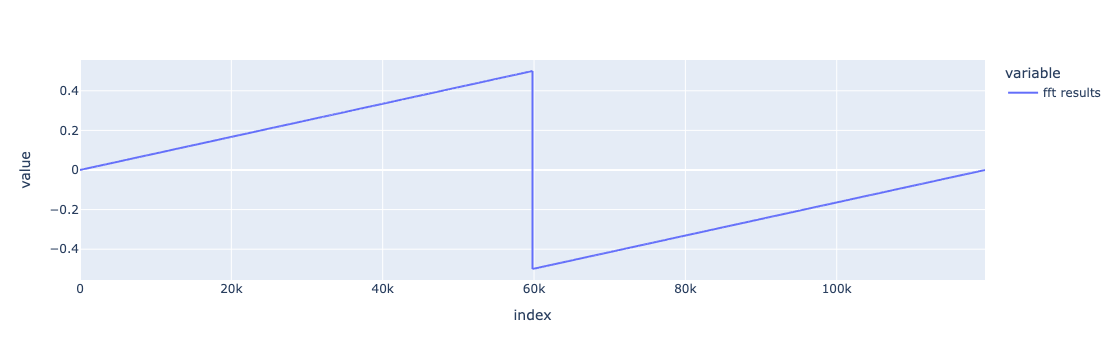

In [54]:
fig = px.line(sample_freq)
fig.show()

## 第六步：变量平稳性分析
针对变量平稳性的分析可以展示数据中的异常变化与波动。

目前包含的平稳性分析方法有：
- ADF
- Phillips-Perron
- DF-GLS
- KPSS
- Zivot-Andrew
- Variance Ratio

In [55]:
# 获取ADF平稳性测试结果
DA.getADF(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -41.33096593552127,
  'P-value': 0.0,
  'Lags': np.int64(57),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
     Augmented Dickey-Fuller Results   
  Test Statistic                -41.331
  P-value                         0.000
  Lags                               57
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [56]:
# 获取Phillips-Perron平稳性测试结果
DA.getPhillipsPerron(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': np.float64(-44.48405810266043),
  'P-value': 0.0,
  'Lags': 71,
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
       Phillips-Perron Test (Z-tau)    
  Test Statistic                -44.484
  P-value                         0.000
  Lags                               71
  -------------------------------------
  
  Trend: Constant
  Critical Values: -3.43 (1%), -2.86 (5%), -2.57 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}

In [57]:
# 获取DF-GLS平稳性测试结果
DA.getDFGLS(start_col='pac',end_col='pac')

{'pac': {'Test Statistic': -10.259607240518978,
  'P-value': np.float64(1.6045290356795468e-17),
  'Lags': np.int64(57),
  'Trend': 'c',
  'Summary': <class 'statsmodels.iolib.summary.Summary'>
  """
        Dickey-Fuller GLS Results      
  Test Statistic                -10.260
  P-value                         0.000
  Lags                               57
  -------------------------------------
  
  Trend: Constant
  Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
  Null Hypothesis: The process contains a unit root.
  Alternative Hypothesis: The process is weakly stationary.
  """}}